    BMI  Age  Sugar
0  33.6   50      1
1  26.6   30      0
2  23.4   40      0
3  43.1   67      0
4  35.3   23      1
5  35.9   67      1
6  36.7   45      1
7  25.7   46      0
8  23.3   29      0
9  31.0   56      1


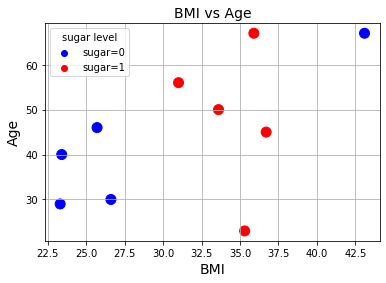

The predicted class for BMI=43.6 and Age=40 is: 1
The person has sugar

Confusion matrix
[[2 0]
 [0 1]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

d1 = {
    'BMI': [33.6, 26.6, 23.4, 43.1, 35.3, 35.9, 36.7, 25.7, 23.3, 31],
    'Age': [50, 30, 40, 67, 23, 67, 45, 46, 29, 56],
    'Sugar': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
}
data1 = pd.DataFrame(d1)
data1.to_csv("New_Dataset.csv", index=False)  

print(data1)
col = data1['Sugar'].map({0: 'blue', 1: 'red'})
plt.scatter(data1['BMI'], data1['Age'], color=col, s=100)
plt.title('BMI vs Age', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.scatter([], [], color='blue', label='sugar=0')
plt.scatter([], [], color='red', label='sugar=1')
plt.legend(title='sugar level')
plt.grid(True)
plt.show()

x = data1[['BMI', 'Age']]
y = data1['Sugar']

scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.3, stratify=y, random_state=0
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

new_data_df = pd.DataFrame([[43.6, 40]], columns=['BMI', 'Age'])
new_data_scaled = scaler.transform(new_data_df)
pred = knn.predict(new_data_scaled)

print(f"The predicted class for BMI=43.6 and Age=40 is: {pred[0]}")
if pred[0] == 0:
    print("The person has no sugar")
else:
    print("The person has sugar")

y_pred = knn.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix")
print(conf_matrix)

print("\nClassification Report")
print(classification_report(y_test, y_pred))


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use the dictionary directly
tennisdata = {
    'Outlook': ['Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create DataFrame
data = pd.DataFrame(tennisdata)

# Features and target
x = data.drop('PlayTennis', axis=1).copy()
y = data['PlayTennis']

# Label Encoding
le_outlook = LabelEncoder()
x['Outlook'] = le_outlook.fit_transform(x['Outlook'])

le_temperature = LabelEncoder()
x['Temperature'] = le_temperature.fit_transform(x['Temperature'])

le_humidity = LabelEncoder()
x['Humidity'] = le_humidity.fit_transform(x['Humidity'])

le_windy = LabelEncoder()
x['Windy'] = le_windy.fit_transform(x['Windy'])

le_play = LabelEncoder()
y = le_play.fit_transform(y)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=0)

# Train the model
classifier = CategoricalNB()
classifier.fit(x_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy is:", accuracy)


Accuracy is: 0.3333333333333333


In [3]:
import pandas as pd
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Your CSV data as a multi-line string
csv_data = """Outlook,Temperature,Humidity,Windy,PlayTennis
Sunny,Hot,High,False,No
Overcast,Hot,High,True,No
Rainy,Hot,High,False,Yes
Rainy,Mild,High,False,Yes
Rainy,Cool,Normal,False,Yes
Overcast,Cool,Normal,True,No
Sunny,Cool,Normal,True,Yes
Sunny,Mild,High,False,No
Rainy,Cool,Normal,False,Yes
Sunny,Mild,Normal,False,Yes
Sunny,Mild,Normal,True,Yes
Overcast,Mild,High,True,Yes
Overcast,Hot,Normal,False,Yes
Rainy,Mild,High,True,No
"""

# Load data from the string as if it were a CSV file
data = pd.read_csv(StringIO(csv_data))

# Separate features and target
X = data.drop('PlayTennis', axis=1)
y = data['PlayTennis']

# Encode categorical features
le_outlook = LabelEncoder()
X['Outlook'] = le_outlook.fit_transform(X['Outlook'])

le_temperature = LabelEncoder()
X['Temperature'] = le_temperature.fit_transform(X['Temperature'])

le_humidity = LabelEncoder()
X['Humidity'] = le_humidity.fit_transform(X['Humidity'])

le_windy = LabelEncoder()
X['Windy'] = le_windy.fit_transform(X['Windy'])

# Encode target variable
le_play = LabelEncoder()
y = le_play.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=0
)

# Train Categorical Naive Bayes
clf = CategoricalNB()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3333333333333333
